# Lecture 20 - ML Evaluation and Experimentation: Baselines, Generalization 1

#### Goals - Baselines

* Know how to come up with good **baselines** for a variety of prediction tasks.

#### Goals - Generalization

* Understand the near-universal **in-distribution** assumption and its implications
* Know how **true risk** differs from **empirical risk**.
* Know how to define **bias**, **variance**, **irreducible error**.
* Be able to identify the most common causes of the above types of error, and explain how they relate to generalization, risk, **overfitting**, **underfitting**.
* Know why and how to create separate **validation** and **test** sets to evaluate a model
* Know how cross-validation works and why you might want to use it.

# So you've made some predictions...

How good are they? Assume we're in a **supervised** setting, so we have some ground truth labels for our training and validation data. Should you call it good and present your results, or keep tweaking your model?

You need an **evaluation environment**. What do you need to make this?

* Data splits: train, val[idation], and test (terminology varies; the book confusingly calls these train, test, and evaluation)
* Evaluation metrics: hard numbers that you can compare from one run to the next
* Baselines: simple approaches that hint at how hard the problem is, and how well you can expect to do

## Make it convenient; make it informative
With good reason, the book recommends that you package all your evaluation machinery into a *single-command program* (this could also be a single notebook or sequence of cells in a notebook).

You should output your candidate model's performance:
* on all the relevant performance metrics
* in comparison with your baselines and other candidate models

It's also a good idea to output:
* Statistics and/or distributions of errors - Do you have lots of small errors and a few big ones? All medium-sized errors? One giant outlier?
* If your data has natural categories or segments, break the errors out by categories:
    * Looking at data over 10 years? Check if your errors are getting better or worse with time.
    * Multiclass classification? Look at your accuracy on each class.
    * etc.

## Baselines

The first rule of machine learning is to **start without machine learning**. (Google [says so](https://developers.google.com/machine-learning/guides/rules-of-ml), so it must be true.)

Why?
* If you aren't learning from data, you can't overfit to it.
* It gives you hints about **how hard your problem is**, putting your model's performance in perspective.



### Baseline Brainstorm

Example prediction problems:
* Biomedical image classification: predict whether an MRI scan shows a tumor or not.
    * Training data contains 90% non-tumor images (negative examples) and 10% tumor images (positive examples).
    

* Spam email classification: predict whether a message is spam.
    * Training data contains equal numbers of spam (positive) and non-spam (negative) examples.
    
   
    
* Weather prediction: given all weather measurements from today and prior,
    * Predict whether it will rain tomorrow
    * Predict the amount of rainfall tomorrow
    
    
    
* Body measurements: predict leg length given height


What generic strategies can we extract from the above?


General baseline strategies:
* Guess randomly
* Guess the mean/median/mode
* History repeats itself

Slightly more advanced:
* Single-feature model
* Linear regression

Special mention:
* Upper-bound baselines

## Machine Learning: Foundational Assumptions

### The In-Distribution Assumption

Generally: **unseen data is drawn from the same distribution as your dataset.**

*Consequence:* We don't assume correlation is causation, but we do assume that observed correlations will hold in unseen data.

## Big Idea: Generalization



**Generalization** is the ability of a model to perform well on **unseen** data (i.e., data that was not in the training set).
* As discussed above: we're usually hoping to perform well on unseen data that is drawn from the **same** distribution as the training set.

In [4]:
import pandas as pd
import seaborn as sns

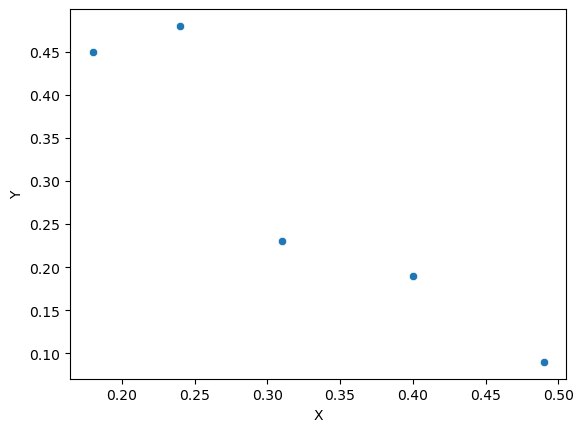

In [5]:
df = pd.DataFrame({
  "X": [0.49, 0.18, 0.31, 0.40, 0.24],
  "Y": [0.09, 0.45, 0.23, 0.19, 0.48]
})
fig = sns.scatterplot(data=df,x="X",y="Y")

Consider the following possible ways to draw a line that fits the data:
* Linear functions (degree-1 polynomials)
* Quadratic functions (degree-2 polynomials)
* Degree-10 polynomials

**Question 1**: Which of these chioces of model will result in the best fit on the training data?

**Question 2**: Which of these will result in the best fit on a *different* batch of data drawn from the same distribution as $\mathcal{X}$? In other words, which of these will **generalize** best?

### Empirical Risk vs True Risk
Let's formalize the above distinction.

We use the word **risk** (or sometimes **loss**, or **cost**) to measure how "badly" a model fits the data.

In the case of a regression problem like the above, we might measure the sum of squared distances from each $y$ value to the line's value at that $x$.

When fitting a model, what we *truly* care about is a quantity known as (true) *risk*: $R(h; {\cal X})$.
- True risk is the expected loss "in the wild"
- Depends on a probability distribution that we don't know: $P(x,y)$ -- the joint distribution of inputs and outputs.
  - If we knew $P$, there's nothing left to "learn": let $\hat{y} = \arg\max_y P(y | x)$.


### Where does risk come from?
There are three contributors to risk:
1. Bias (not the same bias as the $b$ in our linear model)
2. Variance
3. Irrereducible error

To understand bias and variance, we need to consider hypothetical:
  - There is some underlying distribution/source generating input-output pairs
    - The probabily of a pair is denoted $P(x,y)$
    - The probability of the output given the input is denoted $P(y|x)$
    - Why a distribution? Because the same input (x) can have different ouputs (y).
      - Example: x contains home features: square feet, # bedrooms. Many houses are 2400 square feet with 3 bedrooms, and they're not all priced the same.
  - for i in 1..K
    - Get a random training set with $N$ points sampled from $P$
    - Train a model on that training set, call that $h_i(x)$.
  - Define $\bar{h}(x) = \frac{1}{K} \sum_{i=1}^K h_i(x)$

#### Bias
- The **bias** of the training process is how far $\bar{h}(x)$ is from the mean of $P(y|x)$.
- High bias implies something is keeping you from capturing true behavior of the source.
- Most common cause of bias? The model class is too restrictive aka too simple aka not powerful enough aka not expressive enough.
  - E.g., if the true relationship is quadratic, using linear functions will have high bias.
- Training processes with high bias are prone to **underfitting**.
  - Underfitting is when you fail to capture important phenomena in the input-output relationship, leading to higher risk.

#### Variance
- The **variance** of a training process is the variance of the individual models $h_i(x)$; that is, how spread they are around $\bar{h}(x)$.
- This is a problem, because we only have one $h_i$, not $\bar{h}(x)$, so our model might be way off even if the average is good.
- Most common causes of variance?
  - Too powerful/expressive of a model, which is capable of **overfitting** the the training. Overfitting means memorizing or being overly influenced by noise in the training set.
  - Small training set sizes ($N$).
  - Higher irreducible error (noisier training set).

#### Irreducible Error
- Even if you have a zero bias, zero variance training process, you then predict the mean $P(y|x)$, which is almost never right.
  - Because the truth is non-deterministic.
  - This error that remains is the *irreducible error*.
- Source of irreducible error?
  - Not having enough, or enough relevant features in $x$.
- Note: this error is only irreducible for a given feature set (the information in $x$). *If you change the problem to include more features, you can reduce irreducible error.*

### Worksheet: Problems 1 - 4

### Identifying the model with the best generalization (i.e. lowest true risk)
- Answer: hold out a *test set*. Use this to estimate (true) risk.
- So we need a training set and a test set. But that is not enough in practice. Why?
  - The more times you see results on the test set, the less representative it is as an estimate for $R$.
  - Example: 10k random "models"
- We need a training set, a test set, and ideally a *development* or *validation* set.
  - This set is a surrogate for the test set.